In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Cargar el conjunto de datos
url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv"
penguins = pd.read_csv(url)
nombres_espanol = {
    'rowid': 'ID',
    'species': 'Especie',
    'island': 'Isla',
    'bill_length_mm': 'Longitud_Pico_mm',
    'bill_depth_mm': 'Profundidad_Pico_mm',
    'flipper_length_mm': 'Longitud_Aleta_mm',
    'body_mass_g': 'Masa_Corporal_g',
    'sex': 'Sexo',
    'year': 'Año'
}

penguins.rename(columns=nombres_espanol, inplace=True)

In [2]:
# Visualizar las primeras filas del conjunto de datos
penguins.head()



,Especie,Isla,Longitud_Pico_mm,Profundidad_Pico_mm,Longitud_Aleta_mm,Masa_Corporal_g,Sexo,Año
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
# Información general sobre el conjunto de datos
penguins.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Especie              344 non-null    object 
 1   Isla                 344 non-null    object 
 2   Longitud_Pico_mm     342 non-null    float64
 3   Profundidad_Pico_mm  342 non-null    float64
 4   Longitud_Aleta_mm    342 non-null    float64
 5   Masa_Corporal_g      342 non-null    float64
 6   Sexo                 333 non-null    object 
 7   Año                  344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [5]:

# Estadísticas descriptivas de las variables numéricas
penguins.describe(include = 'all')

,Especie,Isla,Longitud_Pico_mm,Profundidad_Pico_mm,Longitud_Aleta_mm,Masa_Corporal_g,Sexo,Año
count,344,344,342.000000,342.000000,342.000000,342.000000,333,344.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,152,168,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,2008.029070
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.818356
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,2009.000000


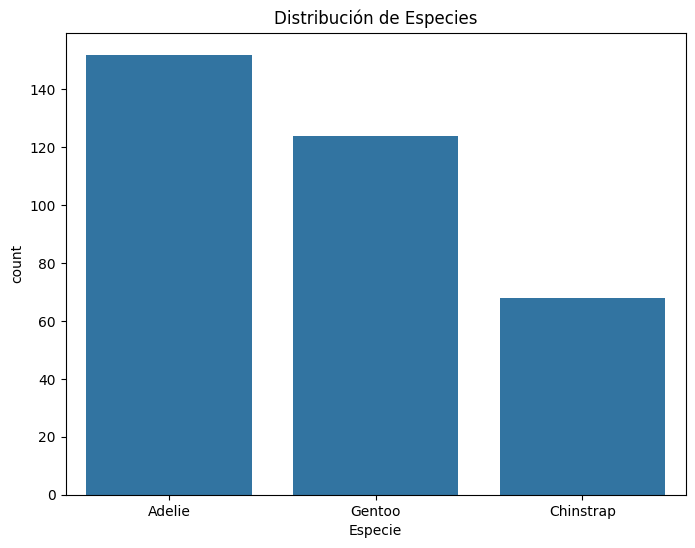

In [6]:
# Distribución de la variable 'species'
plt.figure(figsize=(8, 6))
sns.countplot(x='Especie', data=penguins)
plt.title('Distribución de Especies')
plt.show()




<Figure size 1500x800 with 0 Axes>

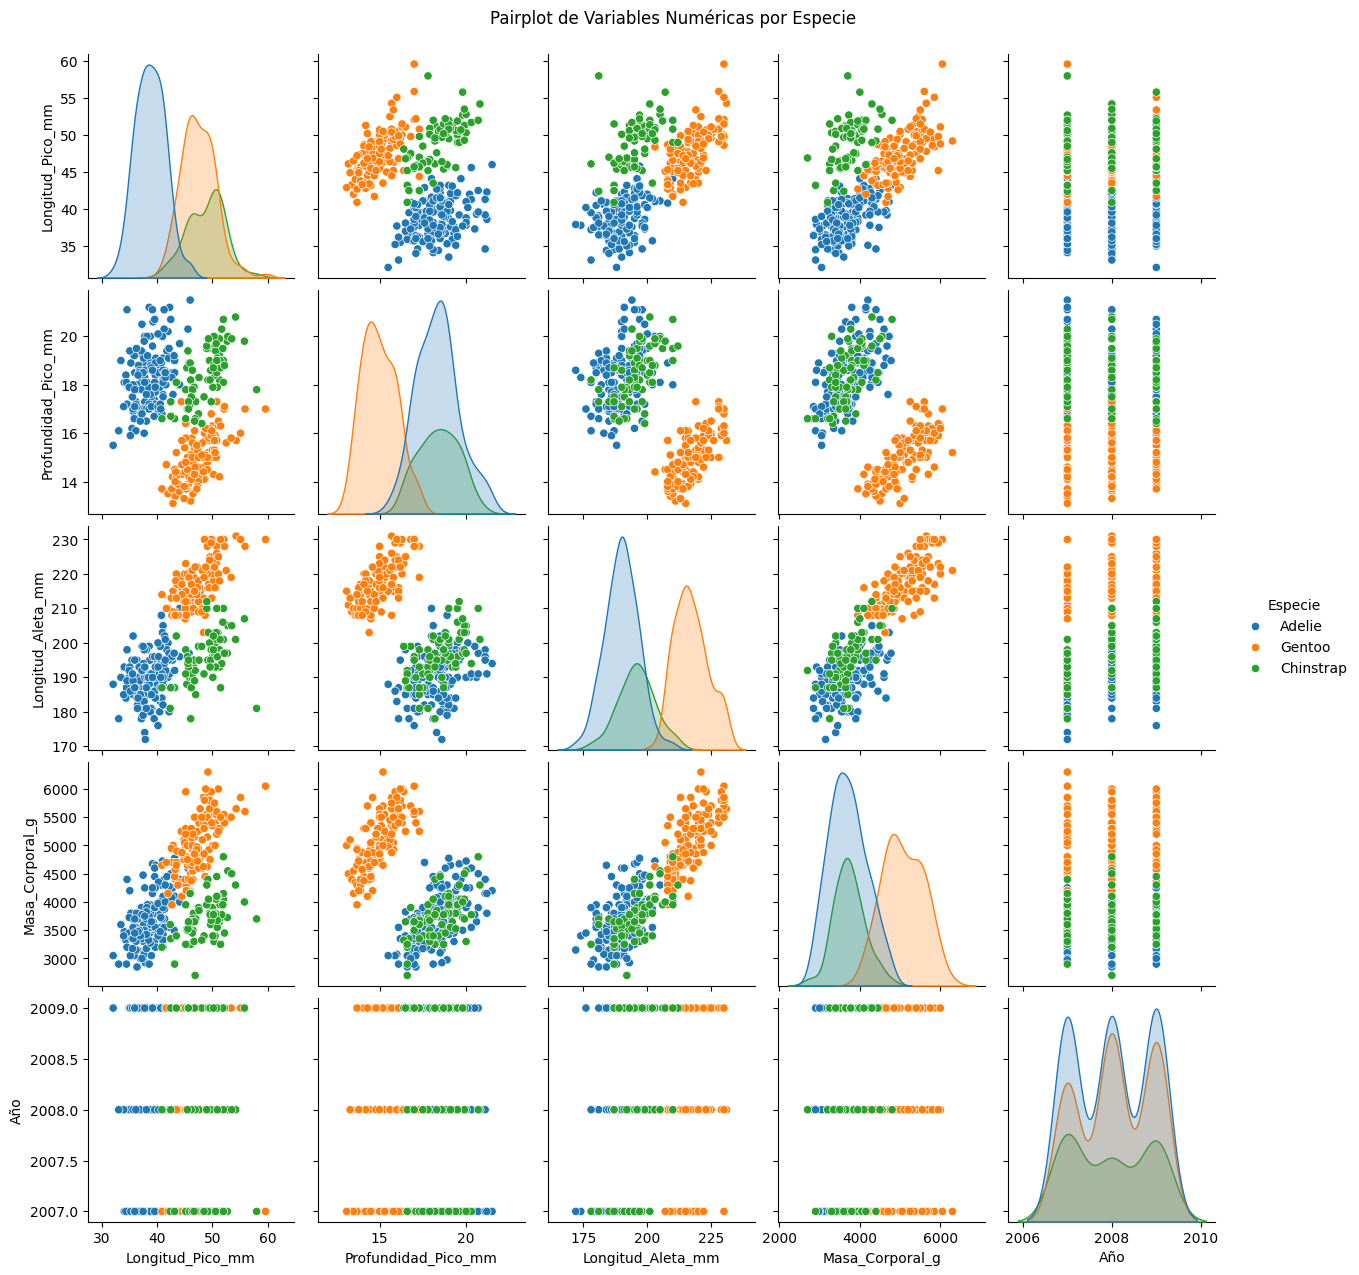

In [7]:
# Distribución de las variables numéricas por especie
plt.figure(figsize=(15, 8))
sns.pairplot(data=penguins, hue='Especie')
plt.suptitle('Pairplot de Variables Numéricas por Especie', y=1.02)
plt.show()


<ipython-input-8-91cb4fb76afc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = penguins.corr()


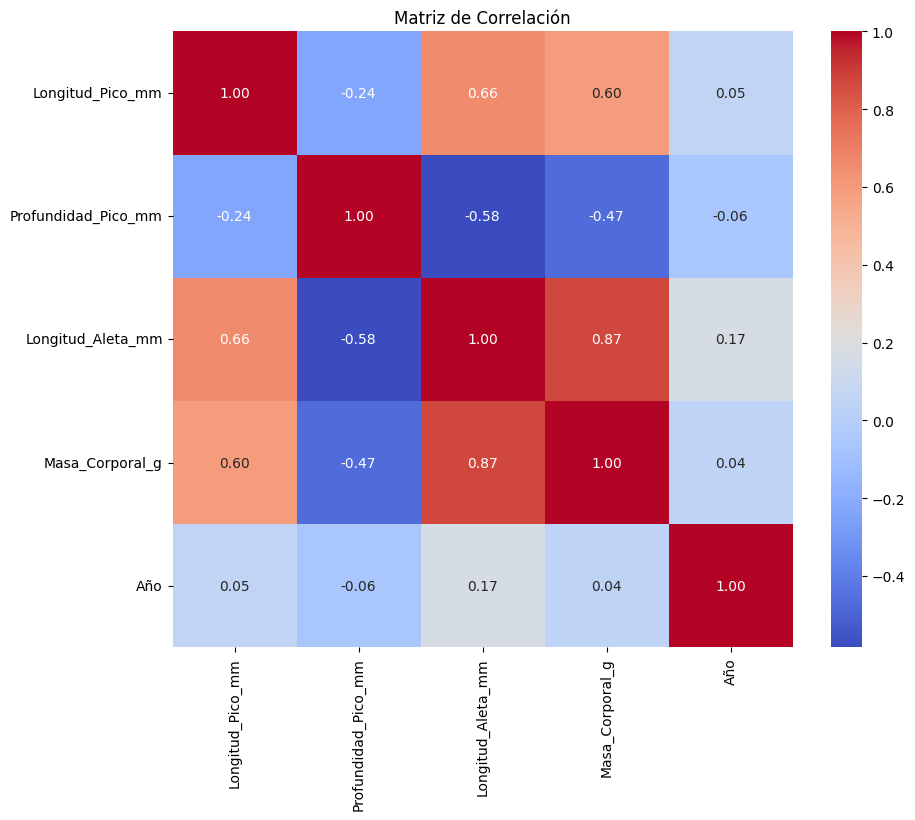

In [8]:

correlation_matrix = penguins.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [9]:
penguins.columns

Index(['Especie', 'Isla', 'Longitud_Pico_mm', 'Profundidad_Pico_mm',
       'Longitud_Aleta_mm', 'Masa_Corporal_g', 'Sexo', 'Año'],
      dtype='object')

In [10]:
penguins.dropna(inplace=True)



In [11]:
penguins

,Especie,Isla,Longitud_Pico_mm,Profundidad_Pico_mm,Longitud_Aleta_mm,Masa_Corporal_g,Sexo,Año
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [12]:
# Convertir variables categóricas en variables dummy
penguins = pd.get_dummies(penguins, columns=['Isla', 'Sexo'])
penguins


,Especie,Longitud_Pico_mm,Profundidad_Pico_mm,Longitud_Aleta_mm,Masa_Corporal_g,Año,Isla_Biscoe,Isla_Dream,Isla_Torgersen,Sexo_female,Sexo_male
0,Adelie,39.1,18.7,181.0,3750.0,2007,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,2007,0,0,1,1,0
2,Adelie,40.3,18.0,195.0,3250.0,2007,0,0,1,1,0
4,Adelie,36.7,19.3,193.0,3450.0,2007,0,0,1,1,0
5,Adelie,39.3,20.6,190.0,3650.0,2007,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0,2009,0,1,0,0,1
340,Chinstrap,43.5,18.1,202.0,3400.0,2009,0,1,0,1,0
341,Chinstrap,49.6,18.2,193.0,3775.0,2009,0,1,0,0,1
342,Chinstrap,50.8,19.0,210.0,4100.0,2009,0,1,0,0,1


In [13]:
X = penguins.drop( 'Especie', axis=1)
y = penguins['Especie']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
# Realizar predicciones en el conjunto de prueba
predicciones = modelo_arbol.predict(X_test)

In [16]:
# Evaluar el desempeño del modelo
accuracy = accuracy_score(y_test, predicciones)
conf_matrix = confusion_matrix(y_test, predicciones)
class_report = classification_report(y_test, predicciones)
print(f'Exactitud del modelo: {accuracy}')
print('\nMatriz de Confusión:')
print(conf_matrix)
print('\nReporte de Clasificación:')
print(class_report)

Exactitud del modelo: 1.0

Matriz de Confusión:
[[31  0  0]
 [ 0 18  0]
 [ 0  0 18]]

Reporte de Clasificación:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        18
      Gentoo       1.00      1.00      1.00        18

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [17]:
import shutil

def find_graphviz_executable():
    # Buscar el ejecutable 'dot' en el PATH
    graphviz_executable = shutil.which('dot')

    if graphviz_executable:
        print(f"Graphviz está instalado en: {graphviz_executable}")
    else:
        print("Graphviz no está instalado o no se encuentra en el PATH.")

find_graphviz_executable()

Graphviz está instalado en: /usr/bin/dot


In [18]:
# Visualizar el árbol de decisión
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
import os
os.environ["PATH"] = os.pathsep + "C:\\Program Files\\Graphviz\\bin"



def dibujar_arbol(arbol):
    dot_data = tree.export_graphviz(arbol, out_file="arbol.dot",
                                    feature_names=X.columns,
                                    class_names = penguins['Especie'].unique(),
                                    filled=True # Reemplaza con tu ruta exacta
                                    )
    graph = graphviz.Source(dot_data)
    graph.format = "dot"
    graph.render("arbol", view=True)

dibujar_arbol(modelo_arbol)

AttributeError: 'NoneType' object has no attribute 'splitlines'

In [19]:
tree.export_graphviz( modelo_arbol, out_file="arbol.dot",
                     feature_names=penguins.drop( 'Especie', axis=1).columns,
                     class_names = penguins['Especie'],
                     filled=True)


In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo_arbol, X_train, y_train, cv=5, scoring='accuracy')

# Muestra los resultados de la validación cruzada
print("Resultados de la Validación Cruzada:")
print("Accuracy promedio:", scores.mean())
print("Desviación estándar:", scores.std())

Resultados de la Validación Cruzada:
Accuracy promedio: 0.9624737945492663
Desviación estándar: 0.0237036377779498
